# 4. Analyzing time series and images

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read & examine DataFrame for this exercise
stocks = pd.read_csv('data/stocks.csv', index_col='Date')
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [4]:
# Change index to time series
stocks.index = pd.to_datetime(stocks.index)

In [5]:
stocks.shape

(3521, 4)

In [6]:
stocks.describe()

,AAPL,IBM,CSCO,MSFT
count,3521.000000,3521.000000,3521.000000,3521.000000
mean,169.827774,118.820996,24.396787,35.497734
std,177.015900,39.805120,16.249696,16.922080
min,13.120000,55.070000,8.600000,15.150000
25%,26.740000,87.790001,17.680000,25.900000
50%,91.809999,106.437500,20.389999,28.230000
75%,256.880005,129.990005,24.180000,34.700001
max,702.100021,215.800003,144.375000,116.562500


## Multiple time series on common axes

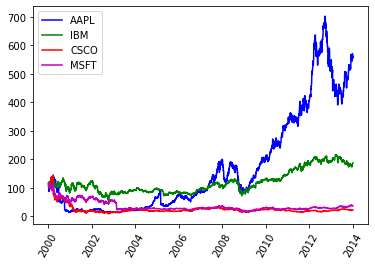

In [7]:
# Plot the aapl time series in blue
plt.plot(stocks.AAPL, c='b', label='AAPL')

# Plot the ibm time series in green
plt.plot(stocks.IBM, c='g', label='IBM')

# Plot the csco time series in red
plt.plot(stocks.CSCO, c='r', label='CSCO')

# Plot the msft time series in magenta
plt.plot(stocks.MSFT, c='m', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

## Multiple time series slices (1)

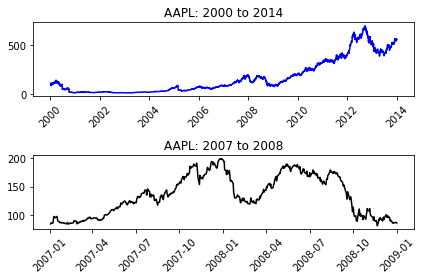

In [8]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2000 to 2014')
plt.plot(stocks.AAPL, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = stocks.AAPL['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


## Multiple time series slices (2)

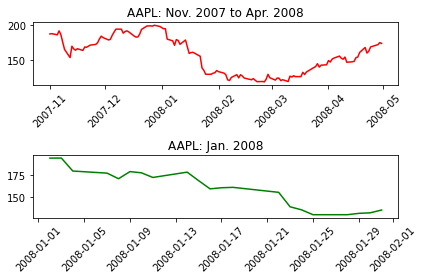

In [9]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = stocks.AAPL['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view_1, c='r')
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')

# Reassign the series by slicing the month January 2008
view_2 = stocks.AAPL['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view_2, c='g')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

## Plotting an inset view

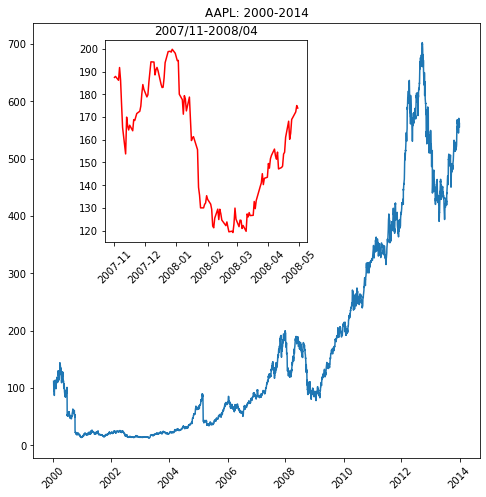

In [10]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = stocks.AAPL['2007-11':'2008-04']

# Plot the entire series 
plt.figure(figsize=(8,8))
plt.plot(stocks.AAPL)
plt.xticks(rotation=45)
plt.title('AAPL: 2000-2014')

# Specify the axes
plt.axes([0.25, 0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

## Plotting moving averages

In [11]:
# Take a look at the DataFrame
stocks.head(1)

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0,108.0625,116.5625


In [12]:
# Create new columns for AAPL moving averages

stocks['mean_30'] = stocks.iloc[:,0].rolling(window=30).mean()
stocks['mean_75'] = stocks.iloc[:,0].rolling(window=75).mean()
stocks['mean_125'] = stocks.iloc[:,0].rolling(window=125).mean()
stocks['mean_250'] = stocks.iloc[:,0].rolling(window=250).mean()

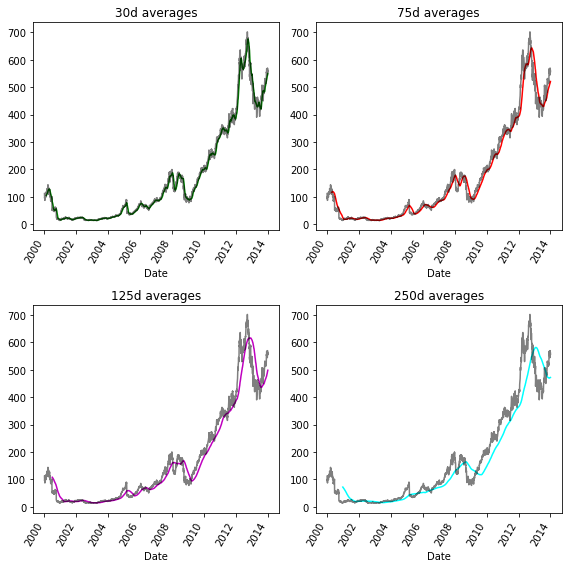

In [13]:
# The time series aapl is overlayed in black in each subplot for comparison.

# Plot the 30-day moving average in the top left subplot in green
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
stocks.mean_30.plot(c='g')
stocks.AAPL.plot(c='k', alpha=0.5)
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
stocks.mean_75.plot(c='r')
stocks.AAPL.plot(c='k', alpha=0.5)
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
stocks.mean_125.plot(c='m')
stocks.AAPL.plot(c='k', alpha=0.5)
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
stocks.mean_250.plot(c='cyan')
stocks.AAPL.plot(c='k', alpha=0.5)
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.tight_layout()
plt.show()


## Plotting moving standard deviations

In [14]:
# Create new columns for AAPL moving standard deviations

stocks['std_30'] = stocks.iloc[:,0].rolling(window=30).std()
stocks['std_75'] = stocks.iloc[:,0].rolling(window=75).std()
stocks['std_125'] = stocks.iloc[:,0].rolling(window=125).std()
stocks['std_250'] = stocks.iloc[:,0].rolling(window=250).std()

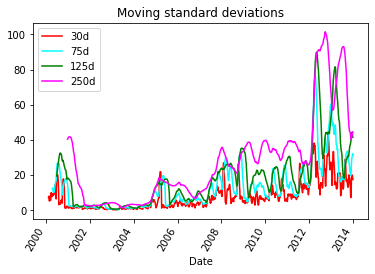

In [15]:
# Plot std_30 in red
stocks.std_30.plot(color='red', label='30d')

# Plot std_75 in cyan
stocks.std_75.plot(color='cyan', label='75d')

# Plot std_125 in green
stocks.std_125.plot(color='green', label='125d')

# Plot std_250 in magenta
stocks.std_250.plot(color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Rotate xtick labels
plt.xticks(rotation=60)

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()

## Extracting a histogram from a grayscale image

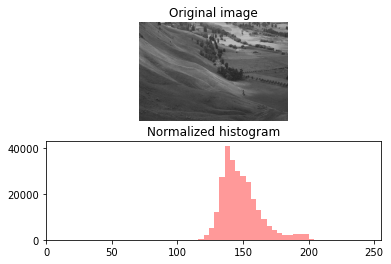

In [18]:
# Load the image into an array: image
image = plt.imread('images/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), color='red', alpha=0.4)

# Display the plot
plt.show()

## Cumulative Distribution Function from an image histogram

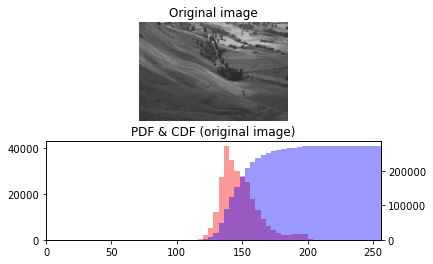

In [21]:
# Load the image into an array: image
image = plt.imread('images/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256),
               color='red', alpha=0.4)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, add title and display plot
plt.xlim((0,256))
plt.title('PDF & CDF (original image)')
plt.show()

## Equalizing an image histogram

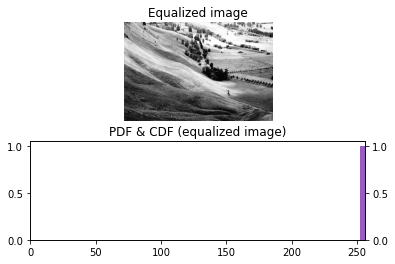

In [23]:
# Load the image into an array: image
image = plt.imread('images/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), color='red', alpha=0.4)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256), cumulative=True, color='blue', alpha=0.4)
plt.show()

## Extracting histograms from a color image

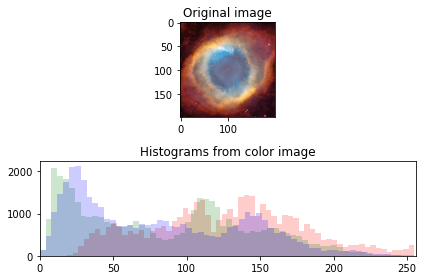

In [24]:
# Load the image into an array: image
image = plt.imread('images/hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, green, blue
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, color='red', alpha=0.2)
plt.hist(green_pixels, bins=64, color='green', alpha=0.2)
plt.hist(blue_pixels, bins=64, color='blue', alpha=0.2)

# Display the plot
plt.tight_layout()
plt.show()

## Extracting bivariate histograms from a color image

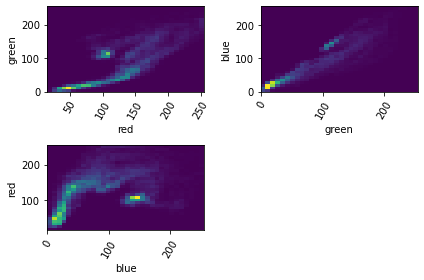

In [25]:
# Load the image into an array: image
image = plt.imread('images/hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(x=red_pixels, y=green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(x=green_pixels, y=blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(x=blue_pixels, y=red_pixels, bins=(32,32))

# Display the plot
plt.tight_layout()
plt.show()